###**Import Library**

In [ ]:
#Import Library
import tensorflow as tf
import random
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.optimizers import Adam
from google.colab import files
from IPython.display import display
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import mse

###**Load Dataset**

In [ ]:
#Memuat Dataset
dataset_keripik = "/content/Keripik_Buah_Multivariat_Penanganan.csv"
df = pd.read_csv(dataset_keripik)

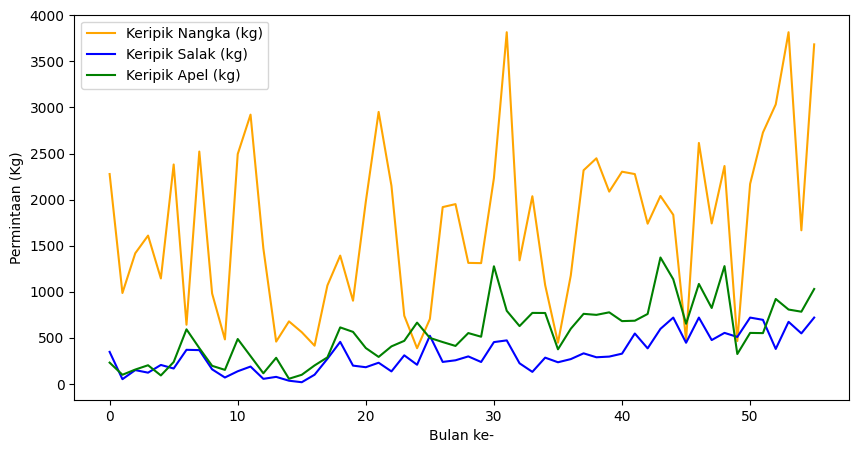

📌 Data Permintaan Keripik Buah:


,Bulan,KeripikNangka(kg),KeripikSalak(kg),KeripikApel(kg)
0,May-20,2277.76,347.31,230.71
1,Jun-20,986.22,50.90,98.92
2,Jul-20,1417.47,149.58,155.41
3,Aug-20,1609.53,121.70,202.10
4,Sep-20,1144.21,205.44,91.60
5,Oct-20,2381.40,166.91,237.40
6,Nov-20,641.83,369.71,592.06
7,Dec-20,2521.68,366.46,388.73
8,Jan-21,981.58,157.90,196.00
9,Feb-21,482.56,69.20,151.98


In [ ]:
# Plot grafik dengan semua kolom
plt.figure(figsize=(10,5))
plt.plot(df.index, df['KeripikNangka(kg)'], linestyle='-', color='orange', label="Keripik Nangka (kg)")
plt.plot(df.index, df['KeripikSalak(kg)'], linestyle='-', color='blue', label="Keripik Salak (kg)")
plt.plot(df.index, df['KeripikApel(kg)'], linestyle='-', color='green', label="Keripik Apel (kg)")

# Menambahkan label dan judul
plt.xlabel("Bulan ke-")
plt.ylabel("Permintaan (Kg)")
plt.legend()
plt.show()

# Mengatur agar seluruh baris dan kolom ditampilkan
pd.set_option('display.max_rows', None)  # Menampilkan seluruh baris
pd.set_option('display.max_columns', None)  # Menampilkan seluruh kolom

# Menampilkan DataFrame setelah penanganan
print("📌 Data Permintaan Keripik Buah:")
display(df)

In [ ]:
# Set seed agar hasil tetap sama
SEED = 123
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

#Ganti target dan fitur sesuai produk yang akan diramalkan
features = ['KeripikSalak(kg)', 'KeripikApel(kg)']
target = 'KeripikNangka(kg)'

# Normalisasi Data
scaler = MinMaxScaler()
data_normalisasi = scaler.fit_transform(df[features + [target]])
print("Data setelah dinormalisasi:")
print(data_normalisasi)

#Menyimpan dalam File Excel (Opsional)
df_normalisasi = pd.DataFrame(data_normalisasi, columns=features + [target])
file_path = "Data_Normalisasi_Multivariat.xlsx"
df_normalisasi.to_excel(file_path, index=False)

📌 Data setelah dinormalisasi:
[[0.46938601 0.13308161 0.55126067]
 [0.0469329  0.03295701 0.17470961]
 [0.18757482 0.07587407 0.30044141]
 [0.14783935 0.11134578 0.35643688]
 [0.2671883  0.0273958  0.22077191]
 [0.2122741  0.13816419 0.58147712]
 [0.50131121 0.40760944 0.07430202]
 [0.49667921 0.25313388 0.62237603]
 [0.19943276 0.10671144 0.17335681]
 [0.07301465 0.0732682  0.02786654]
 [0.16947437 0.3277392  0.61446331]
 [0.242318   0.1867944  0.73920966]
 [0.05227752 0.04513546 0.31620854]
 [0.08277749 0.17276982 0.02095384]
 [0.02348783 0.         0.08492909]
 [0.         0.03285825 0.05068048]
 [0.11618494 0.10998587 0.00800019]
 [0.36192349 0.17624178 0.19855565]
 [0.62443703 0.42351815 0.29310305]
 [0.2567271  0.38654217 0.15033295]
 [0.23207058 0.25311109 0.46431112]
 [0.30156491 0.18016197 0.74776088]
 [0.16745054 0.26702931 0.5141082 ]
 [0.41613933 0.3126434  0.10294409]
 [0.27013853 0.46302402 0.        ]
 [0.71864489 0.33673438 0.09244239]
 [0.3140927  0.30266817 0.44661975

###**Menyusun Model**

In [ ]:
# Menyusun Sequence
def create_sequences(data, timesteps=1):
    x, y = [], []
    for i in range(len(data) - timesteps):
        x.append(data[i:(i+timesteps), :-1])
        y.append(data[i+timesteps, -1])
    return np.array(x), np.array(y)

# Kombinasi Hyperparameter
timesteps_list = [4, 8, 12]
batch_size_list = [8, 16, 32]
neurons_list = [16, 32, 64, 128]
dropout_rate_list = [0.01]
learning_rate_list = [0.0001, 0.001, 0.01]
epochs_list = [1000]

def build_gru_model(neurons, dropout_rate, learning_rate, timesteps, num_features):
  model = Sequential([
      # Layer Input
      Input(shape=(timesteps, num_features)),
      # Layer 1 (GRU)
      GRU(neurons, return_sequences=True),
      Dropout(dropout_rate),
      # Layer 2 (GRU)
      GRU(neurons, return_sequences=True),
      Dropout(dropout_rate),
      # Layer 3 (GRU)
      GRU(neurons, return_sequences=True),
      Dropout(dropout_rate),
      # Layer 4 (GRU)
      GRU(neurons, return_sequences=False),
      Dropout(dropout_rate),
      # Output Layer (Dense) Layer 5
      Dense(1)])

  # Compile model
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss='mse')
  return model

best_mape = float('inf')  # Inisialisasi dengan nilai yang sangat besar
best_model_path = "best_model.keras" #Menyimpan model dengan MAPE test terkecil untuk dipilih

In [ ]:
# Simpan hasil evaluasi
results = []
num_features = len(features)

# Loop melalui semua kombinasi hyperparameter
for timesteps, batch_size, neurons, dropout_rate, learning_rate, epochs in itertools.product(timesteps_list, batch_size_list, neurons_list, dropout_rate_list, learning_rate_list, epochs_list):
  print(f"\nTraining dengan Hyperparameter: timesteps={timesteps}, batch_size={batch_size}, neurons={neurons}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, epochs={epochs}\n")

  #Membuat sequences baru sesuai timesteps
  x, y = create_sequences(data_normalisasi, timesteps)

  # Pembagian Data Training dan Data Testing
  pembagian_data = 0.9 #Konfigurasi Training [0.7; 0.8; 0.9]
  split = int(pembagian_data * len(x))
  x_train, y_train = x[:split], y[:split]
  x_test, y_test = x[split:], y[split:]

  #Membuat Model
  model = build_gru_model(neurons, dropout_rate, learning_rate, timesteps, num_features)

  #Train Model
  early_stopping = EarlyStopping(monitor='loss', patience=40, restore_best_weights=True, verbose=1) #bisa diatur verbose 1
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[early_stopping]) #bisa diatur verbose 0

  # Summary model
  model.summary()

  # Dapatkan epoch terakhir yang digunakan sebelum berhenti untuk ditampilkan
  last_epoch = history.epoch[-1] + 1

  #Prediksi
  prediksi_train = model.predict(x_train)
  prediksi_test = model.predict(x_test)

  #Denormalisasi
  prediksi_train = scaler.inverse_transform(np.hstack((x_train[:, -1, :], prediksi_train.reshape(-1, 1))))[:, -1]
  y_train = scaler.inverse_transform(np.hstack((x_train[:, -1, :], y_train.reshape(-1, 1))))[:, -1]
  prediksi_test = scaler.inverse_transform(np.hstack((x_test[:, -1, :], prediksi_test.reshape(-1, 1))))[:, -1]
  y_test = scaler.inverse_transform(np.hstack((x_test[:, -1, :], y_test.reshape(-1, 1))))[:, -1]

  #Perhitungan Nilai Error Sebagai Evaluasi
  train_mse = mean_squared_error(y_train, prediksi_train)
  test_mse = mean_squared_error(y_test, prediksi_test)

  train_mae = mean_absolute_error(y_train, prediksi_train)
  test_mae = mean_absolute_error(y_test, prediksi_test)

  train_mape = mean_absolute_percentage_error(y_train, prediksi_train) * 100
  test_mape = mean_absolute_percentage_error(y_test, prediksi_test) * 100

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  if test_mape < best_mape:
    best_mape = test_mape
    model.save(best_model_path)  # Simpan model terbaik berdasarkan mape testing terkecil
    print(f"Model terbaik {best_mape:.4f}% disimpan dalam 'best_model.keras'")

  #Simpan Hasil Evaluasi
  results.append({
      'timesteps': timesteps,
      'batch_size': batch_size,
      'neurons': neurons,
      'dropout_rate': dropout_rate,
      'learning_rate': learning_rate,
      'last_epoch': last_epoch,
      'train_mse': round(train_mse, 4),
      'test_mse': round(test_mse, 4),
      'train_mae': round(train_mae, 4),
      'test_mae': round(test_mae, 4),
      'train_mape (%)': round(train_mape, 2),
      'test_mape (%)': round(test_mape, 2),
      'train_rmse': round(train_rmse, 4),
      'test_rmse': round(test_rmse, 4)
  })

  print(f"RMSE Train: {train_rmse:.2f}, RMSE Test: {test_rmse:.2f}, MSE Train: {train_mse:.2f}, MSE Test: {test_mse:.2f}, MAE Train: {train_mae:.2f}, MAE Test: {test_mae:.2f}, MAPE Train: {train_mape:.2f}%, MAPE Test: {test_mape:.2f}%")

#konversi hasil ke dataframe
df_results = pd.DataFrame(results)

# Tampilkan semua baris dan kolom dari seluruh kombinasi hyperparameter
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.float_format', '{:.3f}'.format)  # Format angka lebih rapi

# Menampilkan DataFrame sebagai tabel hasil seluruh kombinasi hyperparameter
display(df_results.style.set_properties(**{'text-align': 'center'}).set_sticky())  # Agar header tetap terlihat saat scroll

file_name = "Hasil GRU Keripik Nangka Bulanan 90% 4HL Multivariat.xlsx"
df_results.to_excel(file_name, index=False)
print("\n Hasil evaluasi telah disimpan dalam file")
#Unduh file hasil otomatis di Google Colab
files.download(file_name)

# Menentukan model terbaik berdasarkan MAPE train terkecil
best_model = df_results.loc[df_results['test_mape (%)'].idxmin()]
best_hyperparameters = best_model[['timesteps', 'batch_size', 'neurons', 'dropout_rate', 'learning_rate', 'last_epoch']]

print("\n Model Terbaik Berdasarkan MAPE Train Terkecil:")
print(best_model)

print("\n Hyperparameter Terbaik:")
print(best_hyperparameters.to_dict())

# Ambil nilai hyperparameter terbaik
best_timesteps = int(best_model['timesteps'])
best_batch_size = int(best_model['batch_size'])
best_neurons = int(best_model['neurons'])
best_dropout_rate = float(best_model['dropout_rate'])
best_learning_rate = float(best_model['learning_rate'])
best_epochs = int(best_model['last_epoch'])


Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 88: early stopping
Restoring model weights from the end of the best epoch: 48.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Model baru dengan MAPE terbaik 33.5341% disimpan sebagai 'best_model.keras'
RMSE Train: 815.35, RMSE Test: 1301.50, MSE Train: 664790.53, MSE Test: 1693896.39, MAE Train: 687.50, MAE Test: 1085.24, MAPE Train: 74.71%, MAPE Test: 33.53%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 50: early stopping
Restoring model weights from the end of the best epoch: 10.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Model baru dengan MAPE terbaik 32.6844% disimpan sebagai 'best_model.keras'
RMSE Train: 815.19, RMSE Test: 1278.03, MSE Train: 664534.40, MSE Test: 1633352.39, MAE Train: 682.65, MAE Test: 1059.24, MAPE Train: 75.14%, MAPE Test: 32.68%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 165: early stopping
Restoring model weights from the end of the best epoch: 125.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
✅ Model baru dengan MAPE terbaik 31.3797% disimpan sebagai 'best_model.keras'
RMSE Train: 81.10, RMSE Test: 1481.75, MSE Train: 6576.97, MSE Test: 2195589.00, MAE Train: 65.88, MAE Test: 1057.21, MAPE Train: 6.77%, MAPE Test: 31.38%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 27.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_14 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Model baru dengan MAPE terbaik 30.1452% disimpan sebagai 'best_model.keras'
RMSE Train: 816.21, RMSE Test: 1163.41, MSE Train: 666206.07, MSE Test: 1353516.38, MAE Train: 677.51, MAE Test: 961.09, MAPE Train: 72.24%, MAPE Test: 30.15%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 721: early stopping
Restoring model weights from the end of the best epoch: 681.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 106.15, RMSE Test: 3918.67, MSE Train: 11267.26, MSE Test: 15355941.24, MAE Train: 75.82, MAE Test: 3590.77, MAPE Train: 8.13%, MAPE Test: 127.39%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 147: early stopping
Restoring model weights from the end of the best epoch: 107.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_20 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_21 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_22 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_23 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 62.34, RMSE Test: 1303.59, MSE Train: 3886.44, MSE Test: 1699352.78, MAE Train: 50.23, MAE Test: 1066.39, MAPE Train: 4.36%, MAPE Test: 33.27%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 170: early stopping
Restoring model weights from the end of the best epoch: 130.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_24 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_25 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_26 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_27 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 945ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
RMSE Train: 813.39, RMSE Test: 1170.92, MSE Train: 661598.92, MSE Test: 1371049.33, MAE Train: 684.39, MAE Test: 989.04, MAPE Train: 73.82%, MAPE Test: 31.36%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 8.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_28 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_29 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_30 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_31 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 814.43, RMSE Test: 1245.95, MSE Train: 663296.73, MSE Test: 1552387.03, MAE Train: 684.12, MAE Test: 1040.48, MAPE Train: 71.53%, MAPE Test: 32.40%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 169: early stopping
Restoring model weights from the end of the best epoch: 129.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_32 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_33 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_34 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_35 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RMSE Train: 70.92, RMSE Test: 1399.72, MSE Train: 5030.08, MSE Test: 1959217.90, MAE Train: 56.02, MAE Test: 1196.49, MAPE Train: 5.45%, MAPE Test: 40.98%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 122: early stopping
Restoring model weights from the end of the best epoch: 82.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_36 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_37 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_38 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_39 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 813.82, RMSE Test: 1136.19, MSE Train: 662299.38, MSE Test: 1290926.88, MAE Train: 684.32, MAE Test: 964.80, MAPE Train: 73.93%, MAPE Test: 30.86%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 475: early stopping
Restoring model weights from the end of the best epoch: 435.


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_40 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_41 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_42 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_43 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RMSE Train: 67.58, RMSE Test: 1913.08, MSE Train: 4566.98, MSE Test: 3659888.22, MAE Train: 54.16, MAE Test: 1667.88, MAPE Train: 5.67%, MAPE Test: 60.93%

Training dengan Hyperparameter: timesteps=4, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 158: early stopping
Restoring model weights from the end of the best epoch: 118.


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_44 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_45 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_46 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_47 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE Train: 49.44, RMSE Test: 1575.21, MSE Train: 2444.73, MSE Test: 2481297.24, MAE Train: 39.81, MAE Test: 1292.05, MAPE Train: 3.67%, MAPE Test: 42.86%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 177: early stopping
Restoring model weights from the end of the best epoch: 137.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_48 (GRU)                    │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_49 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_50 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_51 (GRU)                    │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RMSE Train: 817.37, RMSE Test: 1306.96, MSE Train: 668101.06, MSE Test: 1708137.30, MAE Train: 693.09, MAE Test: 1091.59, MAPE Train: 74.45%, MAPE Test: 33.77%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 71: early stopping
Restoring model weights from the end of the best epoch: 31.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_52 (GRU)                    │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_53 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_54 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_55 (GRU)                    │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 814.98, RMSE Test: 1307.72, MSE Train: 664185.19, MSE Test: 1710136.99, MAE Train: 687.45, MAE Test: 1085.31, MAPE Train: 73.55%, MAPE Test: 33.41%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 312: early stopping
Restoring model weights from the end of the best epoch: 272.


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_56 (GRU)                    │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_57 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_58 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_59 (GRU)                    │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 90.81, RMSE Test: 1854.17, MSE Train: 8246.19, MSE Test: 3437950.04, MAE Train: 77.87, MAE Test: 1549.01, MAPE Train: 8.39%, MAPE Test: 54.18%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 83: early stopping
Restoring model weights from the end of the best epoch: 43.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_60 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_61 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_62 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_63 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 817.02, RMSE Test: 1243.04, MSE Train: 667525.44, MSE Test: 1545147.72, MAE Train: 678.45, MAE Test: 1017.43, MAPE Train: 72.45%, MAPE Test: 31.34%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 107: early stopping
Restoring model weights from the end of the best epoch: 67.


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_64 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_65 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_66 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_67 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 812.31, RMSE Test: 1228.21, MSE Train: 659841.81, MSE Test: 1508497.52, MAE Train: 683.04, MAE Test: 1028.56, MAPE Train: 72.90%, MAPE Test: 32.14%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 330: early stopping
Restoring model weights from the end of the best epoch: 290.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_68 (GRU)                    │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_69 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_70 (GRU)                    │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_71 (GRU)                    │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 88.42, RMSE Test: 1963.43, MSE Train: 7818.01, MSE Test: 3855047.19, MAE Train: 63.92, MAE Test: 1683.63, MAPE Train: 4.65%, MAPE Test: 54.34%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 116: early stopping
Restoring model weights from the end of the best epoch: 76.


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_72 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_73 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_74 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_75 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 814.84, RMSE Test: 1178.84, MSE Train: 663965.12, MSE Test: 1389658.31, MAE Train: 681.38, MAE Test: 981.07, MAPE Train: 72.43%, MAPE Test: 30.82%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 54: early stopping
Restoring model weights from the end of the best epoch: 14.


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_76 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_77 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_78 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_79 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RMSE Train: 815.27, RMSE Test: 1280.40, MSE Train: 664666.99, MSE Test: 1639412.05, MAE Train: 687.14, MAE Test: 1072.20, MAPE Train: 70.62%, MAPE Test: 33.31%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 204: early stopping
Restoring model weights from the end of the best epoch: 164.


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_80 (GRU)                    │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_81 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_82 (GRU)                    │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_83 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 48.14, RMSE Test: 1631.50, MSE Train: 2317.57, MSE Test: 2661785.77, MAE Train: 38.28, MAE Test: 1372.33, MAPE Train: 3.55%, MAPE Test: 44.46%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 92: early stopping
Restoring model weights from the end of the best epoch: 52.


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_84 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_85 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_86 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_87 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 728ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RMSE Train: 814.76, RMSE Test: 1169.46, MSE Train: 663829.08, MSE Test: 1367646.40, MAE Train: 681.32, MAE Test: 977.40, MAPE Train: 72.28%, MAPE Test: 30.82%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 529: early stopping
Restoring model weights from the end of the best epoch: 489.


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_88 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_89 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_90 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_91 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
RMSE Train: 75.57, RMSE Test: 3630.93, MSE Train: 5710.49, MSE Test: 13183658.84, MAE Train: 62.38, MAE Test: 3056.08, MAPE Train: 5.92%, MAPE Test: 106.34%

Training dengan Hyperparameter: timesteps=4, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 207: early stopping
Restoring model weights from the end of the best epoch: 167.


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_92 (GRU)                    │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_93 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_94 (GRU)                    │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_95 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RMSE Train: 51.10, RMSE Test: 1395.27, MSE Train: 2611.48, MSE Test: 1946787.23, MAE Train: 38.00, MAE Test: 1149.93, MAPE Train: 3.22%, MAPE Test: 38.97%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 143: early stopping
Restoring model weights from the end of the best epoch: 103.


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_96 (GRU)                    │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_97 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_98 (GRU)                    │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_99 (GRU)                    │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 815.16, RMSE Test: 1218.84, MSE Train: 664479.19, MSE Test: 1485564.32, MAE Train: 680.70, MAE Test: 1007.97, MAPE Train: 73.77%, MAPE Test: 31.33%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 81: early stopping
Restoring model weights from the end of the best epoch: 41.


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_100 (GRU)                   │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_101 (GRU)                   │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_102 (GRU)                   │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_103 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 818.19, RMSE Test: 1315.48, MSE Train: 669440.33, MSE Test: 1730489.43, MAE Train: 689.88, MAE Test: 1089.90, MAPE Train: 76.02%, MAPE Test: 33.49%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 345: early stopping
Restoring model weights from the end of the best epoch: 305.


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_104 (GRU)                   │ (None, 4, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_105 (GRU)                   │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_106 (GRU)                   │ (None, 4, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 4, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_107 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 768ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 60.92, RMSE Test: 2133.91, MSE Train: 3711.79, MSE Test: 4553569.96, MAE Train: 49.88, MAE Test: 1675.93, MAPE Train: 4.95%, MAPE Test: 54.29%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 162: early stopping
Restoring model weights from the end of the best epoch: 122.


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_108 (GRU)                   │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_109 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_110 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_111 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RMSE Train: 816.84, RMSE Test: 1290.27, MSE Train: 667221.01, MSE Test: 1664792.82, MAE Train: 682.65, MAE Test: 1052.25, MAPE Train: 74.14%, MAPE Test: 32.13%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 136: early stopping
Restoring model weights from the end of the best epoch: 96.


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_112 (GRU)                   │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_113 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_114 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_115 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 816.39, RMSE Test: 1212.68, MSE Train: 666491.59, MSE Test: 1470587.34, MAE Train: 689.50, MAE Test: 1025.46, MAPE Train: 76.71%, MAPE Test: 32.28%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 253: early stopping
Restoring model weights from the end of the best epoch: 213.


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_116 (GRU)                   │ (None, 4, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_117 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_118 (GRU)                   │ (None, 4, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_118 (Dropout)           │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_119 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_119 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 102.16, RMSE Test: 1522.09, MSE Train: 10437.46, MSE Test: 2316773.05, MAE Train: 74.51, MAE Test: 1339.37, MAPE Train: 7.31%, MAPE Test: 46.78%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 166: early stopping
Restoring model weights from the end of the best epoch: 126.


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_120 (GRU)                   │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_121 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_122 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_123 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
RMSE Train: 815.49, RMSE Test: 1230.90, MSE Train: 665018.55, MSE Test: 1515123.38, MAE Train: 684.83, MAE Test: 1026.28, MAPE Train: 74.93%, MAPE Test: 31.99%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 25.


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_124 (GRU)                   │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_125 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_126 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_126 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_127 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_127 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train: 819.73, RMSE Test: 1237.46, MSE Train: 671950.18, MSE Test: 1531306.99, MAE Train: 691.29, MAE Test: 1034.37, MAPE Train: 77.50%, MAPE Test: 32.23%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 321: early stopping
Restoring model weights from the end of the best epoch: 281.


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_128 (GRU)                   │ (None, 4, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_129 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_130 (GRU)                   │ (None, 4, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_131 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
RMSE Train: 39.72, RMSE Test: 1592.94, MSE Train: 1577.83, MSE Test: 2537460.58, MAE Train: 32.64, MAE Test: 1307.15, MAPE Train: 3.09%, MAPE Test: 41.42%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 108: early stopping
Restoring model weights from the end of the best epoch: 68.


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_132 (GRU)                   │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_133 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_134 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_135 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE Train: 814.65, RMSE Test: 1160.18, MSE Train: 663661.71, MSE Test: 1346016.34, MAE Train: 682.89, MAE Test: 973.90, MAPE Train: 74.12%, MAPE Test: 30.83%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 17.


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_136 (GRU)                   │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_137 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_137 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_138 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_139 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_139 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
RMSE Train: 821.79, RMSE Test: 1197.85, MSE Train: 675335.19, MSE Test: 1434833.76, MAE Train: 693.21, MAE Test: 1005.50, MAPE Train: 78.66%, MAPE Test: 31.57%

Training dengan Hyperparameter: timesteps=4, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 410: early stopping
Restoring model weights from the end of the best epoch: 370.


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_140 (GRU)                   │ (None, 4, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_140 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_141 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_141 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_142 (GRU)                   │ (None, 4, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_142 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_143 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_143 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Model baru dengan MAPE terbaik 29.4514% disimpan sebagai 'best_model.keras'
RMSE Train: 51.68, RMSE Test: 1174.48, MSE Train: 2670.75, MSE Test: 1379398.45, MAE Train: 43.93, MAE Test: 949.55, MAPE Train: 4.17%, MAPE Test: 29.45%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 107: early stopping
Restoring model weights from the end of the best epoch: 67.


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_144 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_144 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_145 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_145 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_146 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_146 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_147 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_147 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE Train: 819.93, RMSE Test: 1386.45, MSE Train: 672282.14, MSE Test: 1922242.89, MAE Train: 681.50, MAE Test: 1212.33, MAPE Train: 69.97%, MAPE Test: 36.62%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 5.


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_148 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_148 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_149 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_149 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_150 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_151 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 820.57, RMSE Test: 1341.55, MSE Train: 673330.72, MSE Test: 1799753.18, MAE Train: 679.07, MAE Test: 1183.15, MAPE Train: 68.81%, MAPE Test: 36.12%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 176: early stopping
Restoring model weights from the end of the best epoch: 136.


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_152 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_153 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_153 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_154 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_154 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_155 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_155 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 65.63, RMSE Test: 1744.00, MSE Train: 4307.60, MSE Test: 3041530.42, MAE Train: 50.72, MAE Test: 1632.45, MAPE Train: 4.34%, MAPE Test: 55.21%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 78: early stopping
Restoring model weights from the end of the best epoch: 38.


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_156 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_156 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_157 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_157 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_158 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_158 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_159 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_159 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 818.26, RMSE Test: 1466.72, MSE Train: 669550.70, MSE Test: 2151269.84, MAE Train: 670.25, MAE Test: 1256.84, MAPE Train: 68.09%, MAPE Test: 37.17%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 592: early stopping
Restoring model weights from the end of the best epoch: 552.


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_160 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_160 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_161 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_161 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_162 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_162 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_163 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
RMSE Train: 161.58, RMSE Test: 1982.70, MSE Train: 26108.55, MSE Test: 3931117.73, MAE Train: 125.16, MAE Test: 1739.55, MAPE Train: 11.40%, MAPE Test: 55.94%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 245: early stopping
Restoring model weights from the end of the best epoch: 205.


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_164 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_164 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_165 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_165 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_166 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_166 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_167 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_167 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
RMSE Train: 52.35, RMSE Test: 1384.20, MSE Train: 2740.95, MSE Test: 1916016.24, MAE Train: 43.26, MAE Test: 1133.56, MAPE Train: 4.22%, MAPE Test: 34.14%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 134: early stopping
Restoring model weights from the end of the best epoch: 94.


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_168 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_168 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_169 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_169 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_170 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_170 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_171 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_171 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 813.95, RMSE Test: 1741.46, MSE Train: 662522.09, MSE Test: 3032675.70, MAE Train: 675.60, MAE Test: 1556.26, MAPE Train: 69.77%, MAPE Test: 47.79%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 483: early stopping
Restoring model weights from the end of the best epoch: 443.


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_172 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_172 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_173 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_173 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_174 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_174 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_175 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_175 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 62.87, RMSE Test: 2318.25, MSE Train: 3952.43, MSE Test: 5374297.25, MAE Train: 51.55, MAE Test: 1873.68, MAPE Train: 4.93%, MAPE Test: 66.29%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 156: early stopping
Restoring model weights from the end of the best epoch: 116.


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_176 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_176 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_177 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_177 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_178 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_178 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_179 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_179 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 55.74, RMSE Test: 1584.59, MSE Train: 3107.37, MSE Test: 2510923.64, MAE Train: 44.64, MAE Test: 1565.05, MAPE Train: 3.82%, MAPE Test: 55.92%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 648: early stopping
Restoring model weights from the end of the best epoch: 608.


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_180 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_180 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_181 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_181 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_182 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_182 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_183 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_183 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 655.32, RMSE Test: 2543.76, MSE Train: 429442.13, MSE Test: 6470726.97, MAE Train: 495.23, MAE Test: 2287.73, MAPE Train: 48.59%, MAPE Test: 77.85%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 367: early stopping
Restoring model weights from the end of the best epoch: 327.


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_184 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_184 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_185 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_185 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_186 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_186 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_187 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_187 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 77.53, RMSE Test: 2411.67, MSE Train: 6010.72, MSE Test: 5816162.15, MAE Train: 56.76, MAE Test: 1861.38, MAPE Train: 4.99%, MAPE Test: 56.33%

Training dengan Hyperparameter: timesteps=8, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 23.


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_188 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_188 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_189 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_189 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_190 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_190 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_191 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_191 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE Train: 713.34, RMSE Test: 1853.31, MSE Train: 508847.47, MSE Test: 3434766.26, MAE Train: 567.16, MAE Test: 1624.12, MAPE Train: 52.10%, MAPE Test: 49.91%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 159: early stopping
Restoring model weights from the end of the best epoch: 119.


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_192 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_192 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_193 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_193 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_194 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_194 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_195 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_195 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE Train: 814.18, RMSE Test: 1319.98, MSE Train: 662893.09, MSE Test: 1742349.52, MAE Train: 667.79, MAE Test: 1159.70, MAPE Train: 71.56%, MAPE Test: 35.41%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 264: early stopping
Restoring model weights from the end of the best epoch: 224.


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_196 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_196 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_197 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_197 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_198 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_198 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_199 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_199 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 674.12, RMSE Test: 1028.38, MSE Train: 454433.48, MSE Test: 1057571.74, MAE Train: 499.51, MAE Test: 999.78, MAPE Train: 53.28%, MAPE Test: 35.69%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 254: early stopping
Restoring model weights from the end of the best epoch: 214.


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_200 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_201 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_201 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_202 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_202 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_203 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_203 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 88.91, RMSE Test: 1271.60, MSE Train: 7905.80, MSE Test: 1616966.99, MAE Train: 66.98, MAE Test: 1238.57, MAPE Train: 6.90%, MAPE Test: 43.90%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 100: early stopping
Restoring model weights from the end of the best epoch: 60.


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_204 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_204 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_205 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_205 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_206 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_206 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_207 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_207 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 816.23, RMSE Test: 1306.30, MSE Train: 666233.86, MSE Test: 1706423.72, MAE Train: 664.91, MAE Test: 1143.43, MAPE Train: 71.12%, MAPE Test: 34.92%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 684: early stopping
Restoring model weights from the end of the best epoch: 644.


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_208 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_208 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_209 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_209 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_210 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_210 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_211 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_211 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE Train: 125.28, RMSE Test: 1882.69, MSE Train: 15694.82, MSE Test: 3544523.78, MAE Train: 99.65, MAE Test: 1761.97, MAPE Train: 10.00%, MAPE Test: 58.03%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 277: early stopping
Restoring model weights from the end of the best epoch: 237.


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_212 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_212 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_213 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_213 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_214 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_214 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_215 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_215 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 70.13, RMSE Test: 1381.53, MSE Train: 4918.43, MSE Test: 1908615.30, MAE Train: 55.33, MAE Test: 1342.94, MAPE Train: 4.90%, MAPE Test: 48.55%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 262: early stopping
Restoring model weights from the end of the best epoch: 222.


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_216 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_216 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_217 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_217 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_218 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_218 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_219 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_219 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 784.19, RMSE Test: 1712.47, MSE Train: 614958.99, MSE Test: 2932569.47, MAE Train: 638.42, MAE Test: 1536.05, MAPE Train: 67.72%, MAPE Test: 47.21%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 593: early stopping
Restoring model weights from the end of the best epoch: 553.


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_220 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_220 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_221 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_221 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_222 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_222 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_223 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_223 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 87.10, RMSE Test: 2237.19, MSE Train: 7586.30, MSE Test: 5005035.49, MAE Train: 67.86, MAE Test: 1820.09, MAPE Train: 6.32%, MAPE Test: 58.40%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 140: early stopping
Restoring model weights from the end of the best epoch: 100.


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_224 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_224 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_225 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_225 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_226 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_226 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_227 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_227 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 110.70, RMSE Test: 1952.69, MSE Train: 12253.44, MSE Test: 3812993.91, MAE Train: 85.21, MAE Test: 1718.83, MAPE Train: 7.63%, MAPE Test: 61.44%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 570: early stopping
Restoring model weights from the end of the best epoch: 530.


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_228 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_228 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_229 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_229 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_230 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_230 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_231 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_231 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 683.18, RMSE Test: 1044.47, MSE Train: 466735.00, MSE Test: 1090911.00, MAE Train: 510.74, MAE Test: 938.71, MAPE Train: 54.35%, MAPE Test: 37.11%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 358: early stopping
Restoring model weights from the end of the best epoch: 318.


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_232 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_232 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_233 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_233 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_234 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_234 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_235 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_235 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 100.65, RMSE Test: 3225.86, MSE Train: 10130.56, MSE Test: 10406169.73, MAE Train: 78.16, MAE Test: 2843.66, MAPE Train: 7.95%, MAPE Test: 91.90%

Training dengan Hyperparameter: timesteps=8, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 215: early stopping
Restoring model weights from the end of the best epoch: 175.


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_236 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_236 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_237 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_237 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_238 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_238 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_239 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_239 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 54.62, RMSE Test: 1396.08, MSE Train: 2983.09, MSE Test: 1949034.08, MAE Train: 39.43, MAE Test: 1191.45, MAPE Train: 3.61%, MAPE Test: 46.19%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 132: early stopping
Restoring model weights from the end of the best epoch: 92.


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_240 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_240 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_241 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_241 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_242 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_242 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_243 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_243 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RMSE Train: 819.86, RMSE Test: 1669.43, MSE Train: 672164.37, MSE Test: 2786989.03, MAE Train: 670.72, MAE Test: 1469.09, MAPE Train: 70.75%, MAPE Test: 44.56%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 83: early stopping
Restoring model weights from the end of the best epoch: 43.


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_244 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_244 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_245 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_245 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_246 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_246 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_247 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_247 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 815.47, RMSE Test: 1423.93, MSE Train: 664991.10, MSE Test: 2027563.46, MAE Train: 678.49, MAE Test: 1236.02, MAPE Train: 71.89%, MAPE Test: 37.01%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 495: early stopping
Restoring model weights from the end of the best epoch: 455.


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_248 (GRU)                   │ (None, 8, 16)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_248 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_249 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_249 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_250 (GRU)                   │ (None, 8, 16)          │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_250 (Dropout)           │ (None, 8, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_251 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_251 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 49.73, RMSE Test: 1429.19, MSE Train: 2473.26, MSE Test: 2042596.63, MAE Train: 37.20, MAE Test: 1356.58, MAPE Train: 3.07%, MAPE Test: 44.85%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 200: early stopping
Restoring model weights from the end of the best epoch: 160.


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_252 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_252 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_253 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_253 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_254 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_254 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_255 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_255 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 814.73, RMSE Test: 1342.16, MSE Train: 663785.48, MSE Test: 1801380.16, MAE Train: 671.10, MAE Test: 1178.78, MAPE Train: 69.52%, MAPE Test: 35.88%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 140: early stopping
Restoring model weights from the end of the best epoch: 100.


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_256 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_256 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_257 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_257 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_258 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_258 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_259 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_259 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE Train: 791.36, RMSE Test: 2088.16, MSE Train: 626249.52, MSE Test: 4360395.58, MAE Train: 631.03, MAE Test: 1959.18, MAPE Train: 61.51%, MAPE Test: 63.02%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 270: early stopping
Restoring model weights from the end of the best epoch: 230.


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_260 (GRU)                   │ (None, 8, 32)          │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_260 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_261 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_261 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_262 (GRU)                   │ (None, 8, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_262 (Dropout)           │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_263 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_263 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
RMSE Train: 89.65, RMSE Test: 1601.71, MSE Train: 8036.97, MSE Test: 2565471.00, MAE Train: 72.28, MAE Test: 1236.22, MAPE Train: 6.33%, MAPE Test: 35.68%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 193: early stopping
Restoring model weights from the end of the best epoch: 153.


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_264 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_264 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_265 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_265 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_266 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_266 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_267 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_267 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE Train: 811.01, RMSE Test: 1386.10, MSE Train: 657731.84, MSE Test: 1921269.10, MAE Train: 672.79, MAE Test: 1212.55, MAPE Train: 70.10%, MAPE Test: 36.61%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 542: early stopping
Restoring model weights from the end of the best epoch: 502.


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_268 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_268 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_269 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_269 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_270 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_270 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_271 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_271 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 148.65, RMSE Test: 3357.97, MSE Train: 22098.20, MSE Test: 11275954.75, MAE Train: 111.86, MAE Test: 2345.60, MAPE Train: 9.14%, MAPE Test: 100.85%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 225: early stopping
Restoring model weights from the end of the best epoch: 185.


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_272 (GRU)                   │ (None, 8, 64)          │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_272 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_273 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_273 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_274 (GRU)                   │ (None, 8, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_274 (Dropout)           │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_275 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_275 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
RMSE Train: 55.15, RMSE Test: 1804.22, MSE Train: 3041.53, MSE Test: 3255206.45, MAE Train: 45.25, MAE Test: 1327.01, MAPE Train: 3.69%, MAPE Test: 47.12%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 212: early stopping
Restoring model weights from the end of the best epoch: 172.


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_276 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_276 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_277 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_277 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_278 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_278 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_279 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_279 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 784.86, RMSE Test: 1956.30, MSE Train: 615998.31, MSE Test: 3827101.41, MAE Train: 627.41, MAE Test: 1811.98, MAPE Train: 64.04%, MAPE Test: 57.55%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 423: early stopping
Restoring model weights from the end of the best epoch: 383.


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_280 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_280 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_281 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_281 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_282 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_282 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_283 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_283 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 127.16, RMSE Test: 2276.42, MSE Train: 16168.68, MSE Test: 5182067.97, MAE Train: 90.72, MAE Test: 2074.05, MAPE Train: 10.11%, MAPE Test: 69.95%

Training dengan Hyperparameter: timesteps=8, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 414: early stopping
Restoring model weights from the end of the best epoch: 374.


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_284 (GRU)                   │ (None, 8, 128)         │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_284 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_285 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_285 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_286 (GRU)                   │ (None, 8, 128)         │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_286 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_287 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_287 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 967ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
RMSE Train: 46.94, RMSE Test: 1957.30, MSE Train: 2203.66, MSE Test: 3831021.42, MAE Train: 34.19, MAE Test: 1878.49, MAPE Train: 3.64%, MAPE Test: 66.12%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 71: early stopping
Restoring model weights from the end of the best epoch: 31.


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_288 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_288 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_289 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_289 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_290 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_290 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_291 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_291 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 865ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
RMSE Train: 788.56, RMSE Test: 1286.08, MSE Train: 621828.15, MSE Test: 1654013.01, MAE Train: 645.87, MAE Test: 1150.87, MAPE Train: 70.78%, MAPE Test: 35.67%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 576: early stopping
Restoring model weights from the end of the best epoch: 536.


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_292 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_292 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_293 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_293 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_294 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_294 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_295 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_295 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 228.34, RMSE Test: 2937.73, MSE Train: 52139.64, MSE Test: 8630284.50, MAE Train: 175.16, MAE Test: 2511.76, MAPE Train: 17.46%, MAPE Test: 103.91%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 146: early stopping
Restoring model weights from the end of the best epoch: 106.


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_296 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_296 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_297 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_297 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_298 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_298 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_299 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_299 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 95.18, RMSE Test: 1710.97, MSE Train: 9060.01, MSE Test: 2927428.63, MAE Train: 74.92, MAE Test: 1556.97, MAPE Train: 6.35%, MAPE Test: 48.68%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 335: early stopping
Restoring model weights from the end of the best epoch: 295.


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_300 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_300 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_301 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_301 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_302 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_302 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_303 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_303 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
RMSE Train: 726.55, RMSE Test: 1800.87, MSE Train: 527881.78, MSE Test: 3243142.05, MAE Train: 567.19, MAE Test: 1606.61, MAPE Train: 60.49%, MAPE Test: 49.36%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 470: early stopping
Restoring model weights from the end of the best epoch: 430.


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_304 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_304 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_305 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_305 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_306 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_306 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_307 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_307 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
RMSE Train: 87.91, RMSE Test: 1307.49, MSE Train: 7728.71, MSE Test: 1709528.80, MAE Train: 71.96, MAE Test: 1106.49, MAPE Train: 7.17%, MAPE Test: 32.82%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 191: early stopping
Restoring model weights from the end of the best epoch: 151.


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_308 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_308 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_309 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_309 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_310 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_310 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_311 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_311 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 70.59, RMSE Test: 1467.21, MSE Train: 4983.37, MSE Test: 2152696.64, MAE Train: 55.59, MAE Test: 1185.86, MAPE Train: 4.95%, MAPE Test: 37.83%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 282: early stopping
Restoring model weights from the end of the best epoch: 242.


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_312 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_312 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_313 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_313 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_314 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_314 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_315 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_315 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSE Train: 724.57, RMSE Test: 1744.47, MSE Train: 525005.70, MSE Test: 3043189.92, MAE Train: 564.03, MAE Test: 1540.96, MAPE Train: 60.29%, MAPE Test: 46.86%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 371: early stopping
Restoring model weights from the end of the best epoch: 331.


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_316 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_316 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_317 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_317 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_318 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_318 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_319 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_319 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE Train: 99.61, RMSE Test: 1464.32, MSE Train: 9921.70, MSE Test: 2144232.19, MAE Train: 82.04, MAE Test: 1185.59, MAPE Train: 7.36%, MAPE Test: 35.07%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 168: early stopping
Restoring model weights from the end of the best epoch: 128.


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_320 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_320 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_321 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_321 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_322 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_322 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_323 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_323 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
✅ Model baru dengan MAPE terbaik 26.1818% disimpan sebagai 'best_model.keras'
RMSE Train: 68.56, RMSE Test: 959.30, MSE Train: 4701.09, MSE Test: 920259.12, MAE Train: 52.22, MAE Test: 762.85, MAPE Train: 4.47%, MAPE Test: 26.18%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 603: early stopping
Restoring model weights from the end of the best epoch: 563.


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_324 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_324 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_325 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_325 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_326 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_326 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_327 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_327 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
RMSE Train: 521.20, RMSE Test: 1139.02, MSE Train: 271651.12, MSE Test: 1297373.37, MAE Train: 368.03, MAE Test: 1019.98, MAPE Train: 33.05%, MAPE Test: 41.39%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 291: early stopping
Restoring model weights from the end of the best epoch: 251.


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_328 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_328 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_329 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_329 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_330 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_330 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_331 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_331 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 79.71, RMSE Test: 1400.42, MSE Train: 6353.72, MSE Test: 1961166.31, MAE Train: 61.99, MAE Test: 1210.34, MAPE Train: 5.23%, MAPE Test: 38.44%

Training dengan Hyperparameter: timesteps=12, batch_size=8, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 167: early stopping
Restoring model weights from the end of the best epoch: 127.


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_332 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_332 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_333 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_333 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_334 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_334 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_335 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_335 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 42.06, RMSE Test: 1173.76, MSE Train: 1769.02, MSE Test: 1377705.71, MAE Train: 33.28, MAE Test: 1119.40, MAPE Train: 2.89%, MAPE Test: 38.68%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 40.


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_336 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_336 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_337 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_337 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_338 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_338 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_339 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_339 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 785.97, RMSE Test: 1488.92, MSE Train: 617748.34, MSE Test: 2216876.92, MAE Train: 643.77, MAE Test: 1280.79, MAPE Train: 66.99%, MAPE Test: 37.88%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 233: early stopping
Restoring model weights from the end of the best epoch: 193.


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_340 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_340 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_341 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_341 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_342 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_342 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_343 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_343 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
RMSE Train: 650.55, RMSE Test: 924.57, MSE Train: 423213.44, MSE Test: 854831.16, MAE Train: 472.46, MAE Test: 829.14, MAPE Train: 47.02%, MAPE Test: 29.24%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 317: early stopping
Restoring model weights from the end of the best epoch: 277.


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_344 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_344 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_345 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_345 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_346 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_346 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_347 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_347 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE Train: 105.19, RMSE Test: 1396.67, MSE Train: 11065.84, MSE Test: 1950677.07, MAE Train: 80.54, MAE Test: 1348.28, MAPE Train: 6.41%, MAPE Test: 47.56%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 66: early stopping
Restoring model weights from the end of the best epoch: 26.


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_348 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_348 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_349 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_349 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_350 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_350 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_351 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_351 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
RMSE Train: 787.49, RMSE Test: 1148.50, MSE Train: 620148.36, MSE Test: 1319046.03, MAE Train: 626.85, MAE Test: 1034.87, MAPE Train: 67.03%, MAPE Test: 32.96%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 283: early stopping
Restoring model weights from the end of the best epoch: 243.


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_352 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_352 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_353 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_353 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_354 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_354 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_355 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_355 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 482.35, RMSE Test: 1242.14, MSE Train: 232658.35, MSE Test: 1542917.99, MAE Train: 356.49, MAE Test: 813.57, MAPE Train: 35.68%, MAPE Test: 39.49%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 282: early stopping
Restoring model weights from the end of the best epoch: 242.


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_356 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_356 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_357 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_357 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_358 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_358 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_359 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_359 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 77.47, RMSE Test: 1596.99, MSE Train: 6002.25, MSE Test: 2550392.32, MAE Train: 58.73, MAE Test: 1447.13, MAPE Train: 3.91%, MAPE Test: 45.41%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 282: early stopping
Restoring model weights from the end of the best epoch: 242.


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_360 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_360 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_361 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_361 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_362 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_362 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_363 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_363 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 739.59, RMSE Test: 2058.30, MSE Train: 546995.08, MSE Test: 4236584.52, MAE Train: 569.83, MAE Test: 1876.88, MAPE Train: 58.66%, MAPE Test: 59.23%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 403: early stopping
Restoring model weights from the end of the best epoch: 363.


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_364 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_364 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_365 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_365 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_366 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_366 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_367 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_367 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
RMSE Train: 133.54, RMSE Test: 1629.75, MSE Train: 17832.59, MSE Test: 2656095.52, MAE Train: 103.26, MAE Test: 1368.73, MAPE Train: 9.93%, MAPE Test: 40.96%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 257: early stopping
Restoring model weights from the end of the best epoch: 217.


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_368 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_368 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_369 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_369 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_370 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_370 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_371 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_371 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE Train: 60.36, RMSE Test: 1160.84, MSE Train: 3643.18, MSE Test: 1347540.85, MAE Train: 51.59, MAE Test: 999.86, MAPE Train: 4.23%, MAPE Test: 32.63%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 198: early stopping
Restoring model weights from the end of the best epoch: 158.


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_372 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_372 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_373 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_373 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_374 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_374 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_375 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_375 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 899ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
RMSE Train: 736.94, RMSE Test: 1934.17, MSE Train: 543079.93, MSE Test: 3740997.69, MAE Train: 565.16, MAE Test: 1740.09, MAPE Train: 58.52%, MAPE Test: 54.09%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 398: early stopping
Restoring model weights from the end of the best epoch: 358.


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_376 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_376 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_377 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_377 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_378 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_378 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_379 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_379 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
RMSE Train: 75.66, RMSE Test: 1233.69, MSE Train: 5723.89, MSE Test: 1521987.30, MAE Train: 52.91, MAE Test: 989.16, MAPE Train: 5.11%, MAPE Test: 42.88%

Training dengan Hyperparameter: timesteps=12, batch_size=16, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 184: early stopping
Restoring model weights from the end of the best epoch: 144.


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_380 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_380 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_381 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_381 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_382 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_382 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_383 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_383 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
RMSE Train: 59.80, RMSE Test: 1173.07, MSE Train: 3576.07, MSE Test: 1376099.49, MAE Train: 44.87, MAE Test: 962.81, MAPE Train: 3.81%, MAPE Test: 28.45%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 124: early stopping
Restoring model weights from the end of the best epoch: 84.


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_384 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_384 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_385 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_385 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_386 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_386 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_387 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_387 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 797.32, RMSE Test: 1432.86, MSE Train: 635718.01, MSE Test: 2053081.93, MAE Train: 662.55, MAE Test: 1254.88, MAPE Train: 67.18%, MAPE Test: 37.76%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 83: early stopping
Restoring model weights from the end of the best epoch: 43.


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_388 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_388 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_389 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_389 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_390 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_390 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_391 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_391 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 778.08, RMSE Test: 1325.40, MSE Train: 605415.28, MSE Test: 1756693.08, MAE Train: 611.38, MAE Test: 1158.50, MAPE Train: 61.23%, MAPE Test: 35.20%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=16, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 303: early stopping
Restoring model weights from the end of the best epoch: 263.


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_392 (GRU)                   │ (None, 12, 16)         │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_392 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_393 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_393 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_394 (GRU)                   │ (None, 12, 16)         │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_394 (Dropout)           │ (None, 12, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_395 (GRU)                   │ (None, 16)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_395 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,621 (68.84 KB)

 Trainable params: 5,873 (22.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,748 (45.89 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
RMSE Train: 86.21, RMSE Test: 1704.92, MSE Train: 7432.82, MSE Test: 2906739.53, MAE Train: 64.90, MAE Test: 1600.55, MAPE Train: 4.73%, MAPE Test: 52.10%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 75: early stopping
Restoring model weights from the end of the best epoch: 35.


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_396 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_396 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_397 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_397 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_398 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_398 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_399 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_399 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
RMSE Train: 792.50, RMSE Test: 1199.36, MSE Train: 628050.26, MSE Test: 1438457.68, MAE Train: 637.64, MAE Test: 1080.38, MAPE Train: 66.63%, MAPE Test: 34.06%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 580: early stopping
Restoring model weights from the end of the best epoch: 540.


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_400 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_400 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_401 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_401 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_402 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_402 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_403 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_403 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
RMSE Train: 170.73, RMSE Test: 1589.71, MSE Train: 29147.55, MSE Test: 2527186.56, MAE Train: 131.63, MAE Test: 1389.63, MAPE Train: 11.56%, MAPE Test: 56.68%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=32, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 187: early stopping
Restoring model weights from the end of the best epoch: 147.


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_404 (GRU)                   │ (None, 12, 32)         │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_404 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_405 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_405 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_406 (GRU)                   │ (None, 12, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_406 (Dropout)           │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_407 (GRU)                   │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_407 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,493 (263.65 KB)

 Trainable params: 22,497 (87.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,996 (175.77 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RMSE Train: 131.91, RMSE Test: 1277.19, MSE Train: 17399.30, MSE Test: 1631213.65, MAE Train: 101.39, MAE Test: 1113.26, MAPE Train: 8.99%, MAPE Test: 36.39%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 64: early stopping
Restoring model weights from the end of the best epoch: 24.


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_408 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_408 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_409 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_409 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_410 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_410 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_411 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_411 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE Train: 795.88, RMSE Test: 1165.52, MSE Train: 633421.68, MSE Test: 1358436.63, MAE Train: 627.04, MAE Test: 1045.26, MAPE Train: 64.60%, MAPE Test: 33.08%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 405: early stopping
Restoring model weights from the end of the best epoch: 365.


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_412 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_412 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_413 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_413 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_414 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_414 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_415 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_415 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RMSE Train: 272.69, RMSE Test: 1324.15, MSE Train: 74362.27, MSE Test: 1753368.11, MAE Train: 198.38, MAE Test: 1267.45, MAPE Train: 20.03%, MAPE Test: 42.40%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=64, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 214: early stopping
Restoring model weights from the end of the best epoch: 174.


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_416 (GRU)                   │ (None, 12, 64)         │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_416 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_417 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_417 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_418 (GRU)                   │ (None, 12, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_418 (Dropout)           │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_419 (GRU)                   │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_419 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,005 (1.01 MB)

 Trainable params: 88,001 (343.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 176,004 (687.52 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 763ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
✅ Model baru dengan MAPE terbaik 22.2865% disimpan sebagai 'best_model.keras'
RMSE Train: 92.38, RMSE Test: 840.15, MSE Train: 8533.69, MSE Test: 705850.09, MAE Train: 62.84, MAE Test: 675.18, MAPE Train: 6.48%, MAPE Test: 22.29%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.0001, epochs=1000

Epoch 262: early stopping
Restoring model weights from the end of the best epoch: 222.


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_420 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_420 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_421 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_421 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_422 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_422 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_423 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_423 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
RMSE Train: 748.07, RMSE Test: 1910.95, MSE Train: 559608.73, MSE Test: 3651746.75, MAE Train: 564.56, MAE Test: 1713.83, MAPE Train: 55.40%, MAPE Test: 53.04%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.001, epochs=1000

Epoch 354: early stopping
Restoring model weights from the end of the best epoch: 314.


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_424 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_424 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_425 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_425 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_426 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_426 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_427 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_427 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
RMSE Train: 131.53, RMSE Test: 1822.44, MSE Train: 17299.24, MSE Test: 3321269.67, MAE Train: 105.48, MAE Test: 1682.44, MAPE Train: 9.79%, MAPE Test: 54.90%

Training dengan Hyperparameter: timesteps=12, batch_size=32, neurons=128, dropout_rate=0.01, learning_rate=0.01, epochs=1000

Epoch 554: early stopping
Restoring model weights from the end of the best epoch: 514.


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_428 (GRU)                   │ (None, 12, 128)        │        50,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_428 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_429 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_429 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_430 (GRU)                   │ (None, 12, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_430 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_431 (GRU)                   │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_431 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,101 (3.98 MB)

 Trainable params: 348,033 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 696,068 (2.66 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
RMSE Train: 94.37, RMSE Test: 1232.83, MSE Train: 8905.02, MSE Test: 1519877.39, MAE Train: 72.58, MAE Test: 1092.00, MAPE Train: 5.77%, MAPE Test: 33.65%


,timesteps,batch_size,neurons,dropout_rate,learning_rate,last_epoch,train_mse,test_mse,train_mae,test_mae,train_mape (%),test_mape (%),train_rmse,test_rmse
0,4,8,16,0.010000,0.000100,88,664790.534900,1693896.389200,687.500700,1085.241100,74.710000,33.530000,815.346900,1301.497700
1,4,8,16,0.010000,0.001000,50,664534.398100,1633352.388400,682.652100,1059.238700,75.140000,32.680000,815.189800,1278.026800
2,4,8,16,0.010000,0.010000,165,6576.966100,2195589.001200,65.883900,1057.211200,6.770000,31.380000,81.098500,1481.752000
3,4,8,32,0.010000,0.000100,67,666206.069000,1353516.379100,677.514400,961.087600,72.240000,30.150000,816.214500,1163.407200
4,4,8,32,0.010000,0.001000,721,11267.255700,15355941.244200,75.820500,3590.766900,8.130000,127.390000,106.147300,3918.665700
5,4,8,32,0.010000,0.010000,147,3886.436800,1699352.777900,50.225200,1066.391200,4.360000,33.270000,62.341300,1303.592300
6,4,8,64,0.010000,0.000100,170,661598.920400,1371049.327900,684.385500,989.035700,73.820000,31.360000,813.387300,1170.918200
7,4,8,64,0.010000,0.001000,48,663296.732900,1552387.034200,684.117600,1040.484000,71.530000,32.400000,814.430300,1245.948200
8,4,8,64,0.010000,0.010000,169,5030.077000,1959217.900600,56.016200,1196.489200,5.450000,40.980000,70.923000,1399.720700
9,4,8,128,0.010000,0.000100,122,662299.378000,1290926.881200,684.323200,964.796900,73.930000,30.860000,813.817800,1136.189600



📥 Hasil evaluasi telah disimpan dalam file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎯 Model Terbaik Berdasarkan MAPE Train Terkecil:
timesteps            12.000
batch_size           32.000
neurons              64.000
dropout_rate          0.010
learning_rate         0.010
last_epoch          214.000
train_mse          8533.693
test_mse         705850.088
train_mae            62.843
test_mae            675.182
train_mape (%)        6.480
test_mape (%)        22.290
train_rmse           92.378
test_rmse           840.149
Name: 104, dtype: float64

📌 Hyperparameter Terbaik:
{'timesteps': 12.0, 'batch_size': 32.0, 'neurons': 64.0, 'dropout_rate': 0.01, 'learning_rate': 0.01, 'last_epoch': 214.0}


In [ ]:
best_model_loaded = load_model("best_model.keras", custom_objects={'mse': mse})
print("\n Model terbaik telah dimuat kembali dari 'best_model.keras' untuk digunakan.")

# Buat sequences sesuai best_timesteps
x, y = create_sequences(data_normalisasi, best_timesteps)
last_seq = x[-1]

# Prediksi 12 bulan ke depan
jumlah_bulan = 12
prediksi_berikutnya = []

for i in range(jumlah_bulan):
    last_seq_reshaped = last_seq.reshape(1, best_timesteps, num_features)
    prediksi = best_model_loaded.predict(last_seq_reshaped, verbose=0)
    prediksi_berikutnya.append(prediksi[0, 0])
    last_seq = np.roll(last_seq, shift=-1, axis=0)
    last_seq[-1, -1] = prediksi[0, 0]

print("\n Prediksi untuk bulan-bulan berikutnya telah selesai.")
print("Hasil prediksi:", prediksi_berikutnya)


✅ Model terbaik telah dimuat kembali dari 'best_model.keras' untuk digunakan.

✅ Prediksi untuk bulan-bulan berikutnya telah selesai.
Hasil prediksi: [np.float32(1.0877304), np.float32(0.21579), np.float32(0.51467186), np.float32(0.40354878), np.float32(0.4215451), np.float32(0.20312545), np.float32(0.74079674), np.float32(1.0810636), np.float32(0.5571083), np.float32(0.38669005), np.float32(0.5761438), np.float32(0.43157563)]


In [ ]:
# Denormalisasi hasil prediksi
prediksi_berikutnya = scaler.inverse_transform(np.hstack((np.zeros((12, num_features)), np.array(prediksi_berikutnya).reshape(-1, 1))))[:, -1]

# Buat DataFrame hasil prediksi
df_prediksi = pd.DataFrame({
    "Bulan Ke-": range(1, len(prediksi_berikutnya) + 1),
    "Hasil Peramalan (Kg)": prediksi_berikutnya.flatten()
})

# Tampilkan hasil prediksi
print("\n Prediksi Permintaan Keripik Buah Tahun 2025 dengan Model Terbaik:")
print(df_prediksi)


📊 Prediksi Permintaan Keripik Nangka Tahun 2025 dengan Model Terbaik:
    Bulan Ke-  Hasil Peramalan (Kg)
0           1              4117.808
1           2              1127.122
2           3              2152.263
3           4              1771.120
4           5              1832.846
5           6              1083.684
6           7              2927.854
7           8              4094.942
8           9              2297.817
9          10              1713.296
10         11              2363.107
11         12              1867.250


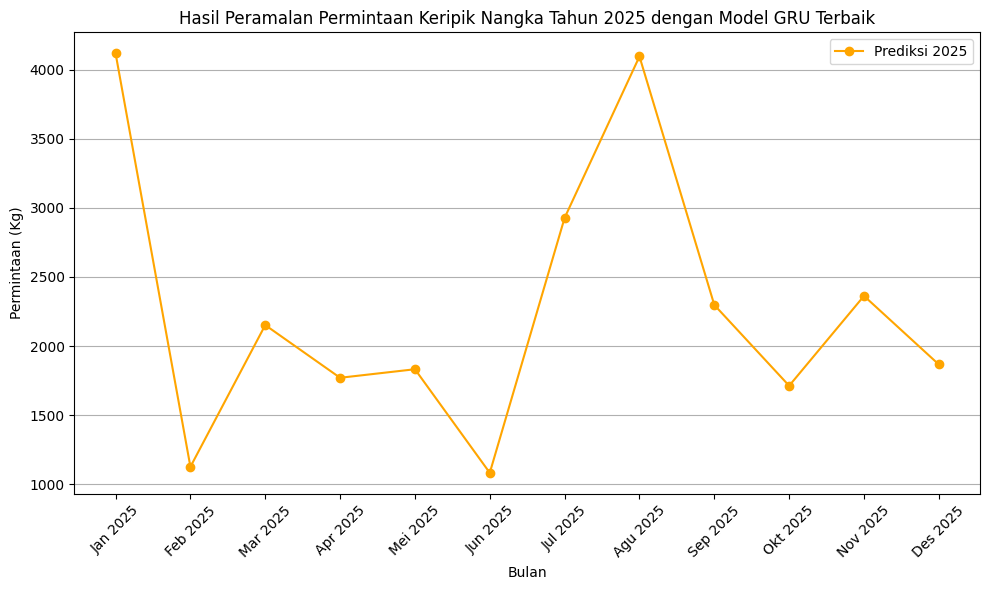

In [ ]:
# Daftar nama bulan untuk tahun 2025
bulan_2025 = ['Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025', 'Mei 2025', 'Jun 2025',
              'Jul 2025', 'Agu 2025', 'Sep 2025', 'Okt 2025', 'Nov 2025', 'Des 2025']

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(bulan_2025, prediksi_berikutnya, marker='o', linestyle='-', color='orange', label='Prediksi 2025')
plt.xlabel("Bulan")
plt.ylabel("Permintaan (Kg)")
plt.title("Hasil Peramalan Permintaan Keripik Nangka Tahun 2025 dengan Model GRU Terbaik")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-61-66afcd562b3e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulan_index = pd.date_range(start=start_date, periods=periods, freq='M').strftime('%b %Y')  # 'Mei 2020', dll


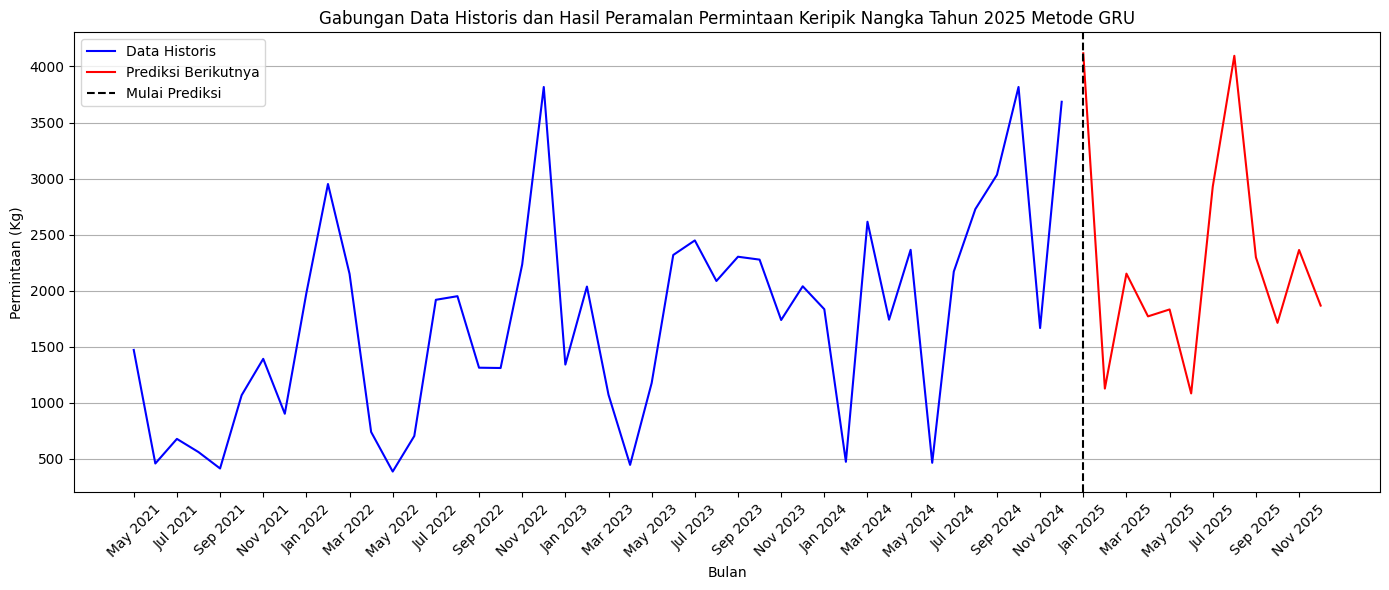

In [ ]:
start_date = '2021-05' #Perhatikan timesteps terbaiknya
periods = len(y_train) + len(y_test) + len(prediksi_berikutnya)
bulan_index = pd.date_range(start=start_date, periods=periods, freq='M').strftime('%b %Y')  # 'Mei 2020', dll

# Gabungkan data historis
historical_data = np.concatenate([y_train, y_test])
total_days = len(historical_data) + len(prediksi_berikutnya)
plt.figure(figsize=(14, 6))
plt.plot(historical_data, label='Data Historis', color='blue')

# Plot Data Prediksi
plt.plot(range(len(historical_data), total_days), prediksi_berikutnya, label='Prediksi Berikutnya', color='red')

# Tambahkan Garis Vertikal sebagai Pemisah
plt.axvline(x=len(historical_data), color='black', linestyle='dashed', label='Mulai Prediksi')

# Tambahkan label bulan ke sumbu X (Step untuk mengatur interval bulan di sumbu X)
plt.xticks(ticks=np.arange(0, periods, step=2), labels=bulan_index[::2], rotation=45)

# Label dan Judul
plt.xlabel('Bulan')
plt.ylabel('Permintaan (Kg)')
plt.title('Gabungan Data Historis dan Hasil Peramalan Permintaan Keripik Nangka Tahun 2025 Metode GRU')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-62-eb6055857e85>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulan_index = pd.date_range(start=start_date, periods=total_periods, freq='M').strftime('%b %Y')  # atau '%B %Y' untuk nama bulan lengkap


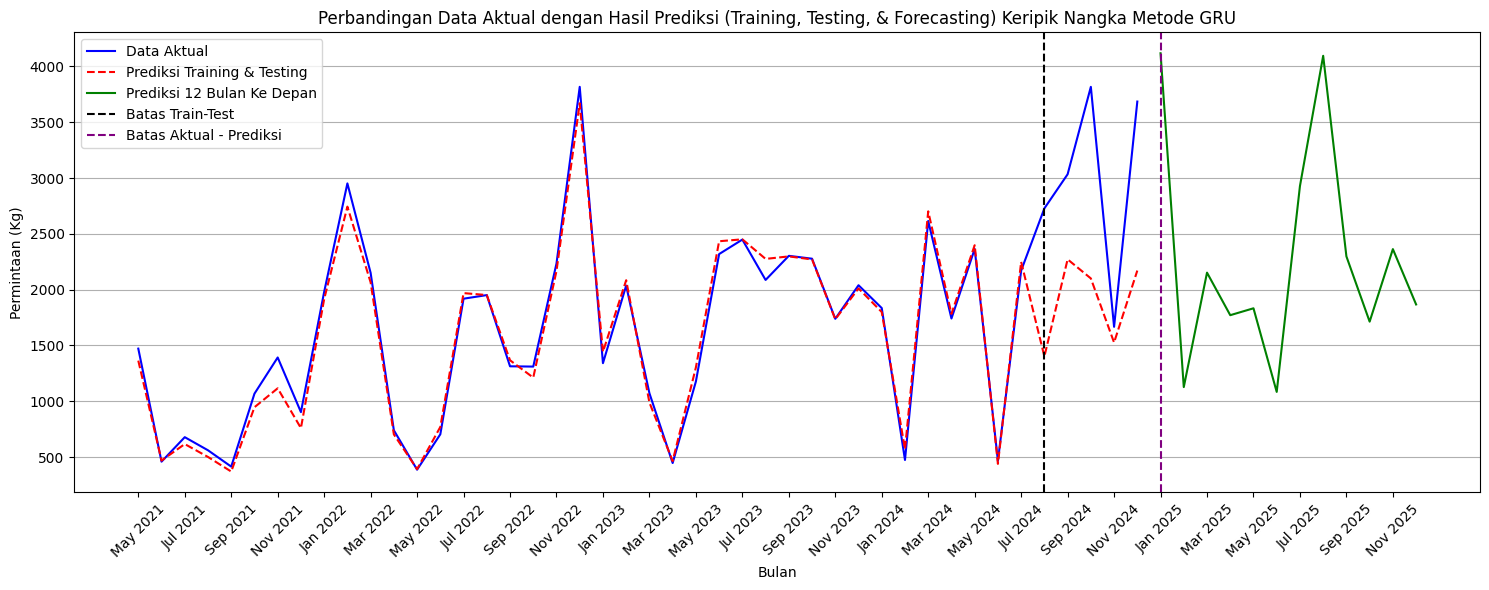

In [ ]:
# Gabungkan Data Aktual
y_actual = np.concatenate([y_train, y_test])

# Gabungkan Hasil Prediksi dari Model Terbaik
y_pred_combined = np.concatenate([prediksi_train, prediksi_test])

# Buat Index Waktu
total_periods = len(y_actual) + len(prediksi_berikutnya)
start_date = '2021-05' #Perhatikan timesteps terbaiknya
bulan_index = pd.date_range(start=start_date, periods=total_periods, freq='M').strftime('%b %Y')  # atau '%B %Y' untuk nama bulan lengkap

# Buat Index untuk Plot
time_actual = np.arange(len(y_actual))
time_forecast = np.arange(len(y_actual), total_periods)

# Plot Perbandingan Data
plt.figure(figsize=(15, 6))

# Plot Data Aktual
plt.plot(time_actual, y_actual, label="Data Aktual", color='blue')

# Plot Hasil Prediksi (Training & Testing)
plt.plot(time_actual, y_pred_combined, label="Prediksi Training & Testing", color='red', linestyle='dashed')

# Plot Prediksi 12 Bulan ke Depan
plt.plot(time_forecast, prediksi_berikutnya, label="Prediksi 12 Bulan Ke Depan", color='green')

# Garis Pemisah
plt.axvline(x=len(y_train), color='black', linestyle='--', label="Batas Train-Test")
plt.axvline(x=len(y_actual), color='purple', linestyle='--', label="Batas Aktual - Prediksi")

# Label Bulan
plt.xticks(ticks=np.arange(0, total_periods, step=2), labels=bulan_index[::2], rotation=45)

# Keterangan
plt.legend()
plt.title("Perbandingan Data Aktual dengan Hasil Prediksi (Training, Testing, & Forecasting) Keripik Nangka Metode GRU")
plt.xlabel("Bulan")
plt.ylabel("Permintaan (Kg)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Buat panjang total
total_length = len(y_actual)
forecast_length = len(prediksi_berikutnya)

# Inisialisasi kolom-kolom dengan NaN
df = pd.DataFrame({
    'Data Aktual': np.concatenate([y_actual, [np.nan]*forecast_length]),
    'Prediksi Train': [*prediksi_train, *[np.nan]*(total_length + forecast_length - len(prediksi_train))],
    'Prediksi Test': [*([np.nan]*len(y_train)), *prediksi_test, *[np.nan]*forecast_length],
    'Prediksi Forecast': [*([np.nan]*total_length), *prediksi_berikutnya]
})

# Tambahkan kolom waktu (opsional)
df.index.name = 'Bulan ke-'
df.reset_index(inplace=True)
print(df)

    Bulan ke-  Data Aktual  Prediksi Train  Prediksi Test  Prediksi Forecast
0           0     1471.550        1364.032            NaN                NaN
1           1      458.850         468.672            NaN                NaN
2           2      678.280         616.628            NaN                NaN
3           3      560.810         500.960            NaN                NaN
4           4      414.420         370.177            NaN                NaN
5           5     1068.010         946.504            NaN                NaN
6           6     1392.300        1116.125            NaN                NaN
7           7      902.610         759.444            NaN                NaN
8           8     1979.530        1915.057            NaN                NaN
9           9     2951.740        2743.668            NaN                NaN
10         10     2150.330        2065.109            NaN                NaN
11         11      740.070         703.117            NaN                NaN

In [ ]:
# Buat panjang total
total_length = len(y_actual)
forecast_length = len(prediksi_berikutnya)

# Buat daftar bulan mulai dari Mei 2020
tanggal_index = pd.date_range(start='2021-05', periods=total_length + forecast_length, freq='M')
nama_bulan = tanggal_index.strftime('%b %Y')  # Untuk format 'Mei 2020' dll

# Inisialisasi kolom-kolom dengan NaN
df = pd.DataFrame({
    'Data Aktual': np.concatenate([y_actual, [np.nan]*forecast_length]),
    'Prediksi Train': [*prediksi_train, *[np.nan]*(total_length + forecast_length - len(prediksi_train))],
    'Prediksi Test': [*[np.nan]*len(y_train), *prediksi_test, *[np.nan]*forecast_length],
    'Prediksi Forecast': [*[np.nan]*total_length, *prediksi_berikutnya]
}, index=nama_bulan)

# Ganti nama index jadi "Bulan"
df.index.name = 'Bulan'
print(df)

          Data Aktual  Prediksi Train  Prediksi Test  Prediksi Forecast
Bulan                                                                  
May 2021     1471.550        1364.032            NaN                NaN
Jun 2021      458.850         468.672            NaN                NaN
Jul 2021      678.280         616.628            NaN                NaN
Aug 2021      560.810         500.960            NaN                NaN
Sep 2021      414.420         370.177            NaN                NaN
Oct 2021     1068.010         946.504            NaN                NaN
Nov 2021     1392.300        1116.125            NaN                NaN
Dec 2021      902.610         759.444            NaN                NaN
Jan 2022     1979.530        1915.057            NaN                NaN
Feb 2022     2951.740        2743.668            NaN                NaN
Mar 2022     2150.330        2065.109            NaN                NaN
Apr 2022      740.070         703.117            NaN            

<ipython-input-63-fe030165cedb>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tanggal_index = pd.date_range(start='2021-05', periods=total_length + forecast_length, freq='M')


In [ ]:
# Simpan ke file Excel
nama_file = 'Hasil Prediksi Keripik Nangka GRU 90%.xlsx'
df.to_excel(nama_file, index=False)

print(f"Data berhasil disimpan ke file: {nama_file}")

Data berhasil disimpan ke file: Hasil Prediksi Keripik Nangka GRU 90%.xlsx
